***LIBRARIES REQUIRED***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Embedding, Input, GRU
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

***LOADING DATA INTO DATAFRAME***

In [ ]:
df=pd.read_csv('bbc-text.csv',delimiter=',',encoding='latin-1')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


***VISUALIZING DATA SET***

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Articles')

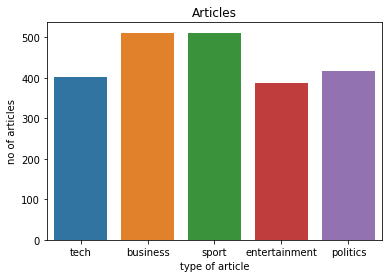

In [ ]:
sns.countplot(df.category)
plt.xlabel('type of article')
plt.ylabel('no of articles')
plt.title('Articles')

***CREATE INPUT AND OUTPUT VECTOR***

In [ ]:
X=df.text
Y=df.category
le=LabelEncoder()
Y=le.fit_transform(Y)
Y=Y.reshape(-1,1)

***SPLITTING DATA INTO TRAIN AND TEST***

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)

***PROCESS THE DATA***

In [ ]:
max_words=4000
max_len=800
tok=Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences=tok.texts_to_sequences(X_train)
sequences_matrix=sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
print(sequences_matrix)

[[   0    0    0 ...  771    3    1]
 [   0    0    0 ...   58  504  108]
 [   0    0    0 ...  132   70   13]
 ...
 [   0    0    0 ... 3141   19 1275]
 [   0    0    0 ...    2   16  298]
 [   0    0    0 ...   12    1 1244]]


***RNN STRUCTURE***

In [ ]:
#def RNN():
 # inputs= Input(name='inputs',shape=[max_len]) 
  #layer=Embedding(max_words,60,input_length=max_len)(inputs)
  #layer=LSTM(256)(layer)
  #layer = Dense(256,name='FC1',kernel_initializer='glorot_uniform', bias_initializer='zeros')(layer)
  #layer = Activation('relu')(layer)
  #layer = Dropout(0.5)(layer)
  #layer = Dense(1,name='out_layer',kernel_initializer='glorot_uniform', bias_initializer='zeros')(layer)
  #layer = Activation('sigmoid')(layer)
  #model = Model(inputs=inputs,outputs=layer)
  #return model


In [ ]:
def RNN():
  inputs=Input(name='inputs',shape=[max_len])
  layer=Embedding(max_words,64,input_length=max_len)(inputs)
  layer=GRU(64)(layer)
  layer=Dense(64)(layer)
  layer=Activation('relu')(layer)
  layer=Dropout(0.5)(layer)
  layer=Dense(6)(layer)
  layer=Activation('softmax')(layer)
  model=Model(inputs=inputs,outputs=layer)
  return model

In [ ]:
model=RNN()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy']
              )

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 800)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 800, 64)           256000    
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=64,epochs=100,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/100
24/24 [==============================] - 11s 446ms/step - loss: 1.7612 - accuracy: 0.2229 - val_loss: 1.7068 - val_accuracy: 0.2401
Epoch 2/100
24/24 [==============================] - 10s 433ms/step - loss: 1.6604 - accuracy: 0.2381 - val_loss: 1.6239 - val_accuracy: 0.2375
Epoch 3/100
24/24 [==============================] - 10s 431ms/step - loss: 1.5965 - accuracy: 0.2824 - val_loss: 1.5782 - val_accuracy: 0.2612
Epoch 4/100
24/24 [==============================] - 10s 430ms/step - loss: 1.4816 - accuracy: 0.3889 - val_loss: 1.4625 - val_accuracy: 0.4749
Epoch 5/100
24/24 [==============================] - 10s 432ms/step - loss: 1.1509 - accuracy: 0.6455 - val_loss: 1.2439 - val_accuracy: 0.5092
Epoch 6/100
24/24 [==============================] - 10s 432ms/step - loss: 0.7294 - accuracy: 0.7685 - val_loss: 0.9411 - val_accuracy: 0.6253
Epoch 7/100
24/24 [==============================] - 10s 434ms/step - loss: 0.4003 - accuracy: 0.8796 - val_loss: 0.8491 - val_accuracy:

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

11/11 [==============================] - 1s 58ms/step - loss: 0.8785 - accuracy: 0.7156


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.878
  Accuracy: 0.716
